In [1]:
#Beryl Sawyerr

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from jupyter_dash import JupyterDash
import dash
from dash import dcc, html, Input, Output
import joblib
from sklearn.pipeline import Pipeline
%matplotlib inline

## Exploratory data analysis

This project uses data from the Cleveland Clinic Heart Disease dataset, collated by Dr Robert Detrano, M.D., Ph.D.
It was collected in response to the need for noninvasive coronary heart disease diagnostics, an alternative the gold stanard coronary angiogram. The original dataset contains 303 observations and 76 attributes, however for the purposes of this project a subset of 14 attributes(13 observable features and 1 taget variable) is used. The features include scores for alternative non-invasive diagnostics tests for heart disease, as well as some patient information. As there were no missing values, the dataset did not need much pre-processing. I only renamed some column heads just for ease of comprehension, prior to commencing exploratory work. It is also worth noting that the last column denotes the presence and severity of heart disease ie 0= no coronary disease, and 1-4 representing progressive severity of the occlusion. Prior work with this dataset has investigated purely the presence or absence of heart disease, ie 0 for no disease and 1 otherwise (values 1-4).

Attribute Information:

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the
hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
* Value 1: upsloping
* Value 2: flat
* Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy (for calcification of vessels)
13. thal: results of nuclear stress test (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. num: target variable representing diagnosis of heart disease (angiographic disease status) in any major vessel
* Value 0: < 50% diameter narrowing
* Value 1: > 50% diameter narrowing

In [30]:
#read in dataset and rename columns

df = pd.read_csv("https://raw.githubusercontent.com/bsawyer5/finalproject/main/data/processed_cleveland.csv")
df = df.rename(columns={"cp": "chest_pain", "trestbps": "resting_bloodpressure", "chol":"cholesterol", "fbs":"fasting_bloodsugar", "restecg":"resting_ecg", "thalach":"max_heartrate", "exang":"angina_exercise", "oldpeak":"st_depression", "slope":"st_slope", "ca":"vessel_calcification", "thal":"stress_test", "num":"disease_state"})
df

,age,sex,chest_pain,resting_bloodpressure,cholesterol,fasting_bloodsugar,resting_ecg,max_heartrate,angina_exercise,st_depression,st_slope,vessel_calcification,stress_test,disease_state
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [3]:
#Check for any missing values

df.isnull().sum()

age                      0
sex                      0
chest_pain               0
resting_bloodpressure    0
cholesterol              0
fasting_bloodsugar       0
resting_ecg              0
max_heartrate            0
angina_exercise          0
st_depression            0
st_slope                 0
vessel_calcification     0
stress_test              0
disease_state            0
dtype: int64

Although there are no null values in the dataframe, there are rows with '?' value in the vessel calcification column, so these will be dropped.

In [4]:
df = df[ (df['vessel_calcification'] != '?') & (df['stress_test'] != '?')]
df

,age,sex,chest_pain,resting_bloodpressure,cholesterol,fasting_bloodsugar,resting_ecg,max_heartrate,angina_exercise,st_depression,st_slope,vessel_calcification,stress_test,disease_state
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3


In [5]:
#Summary statistics of dataframe

stats = df.describe()
stats

,age,sex,chest_pain,resting_bloodpressure,cholesterol,fasting_bloodsugar,resting_ecg,max_heartrate,angina_exercise,st_depression,st_slope,disease_state
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


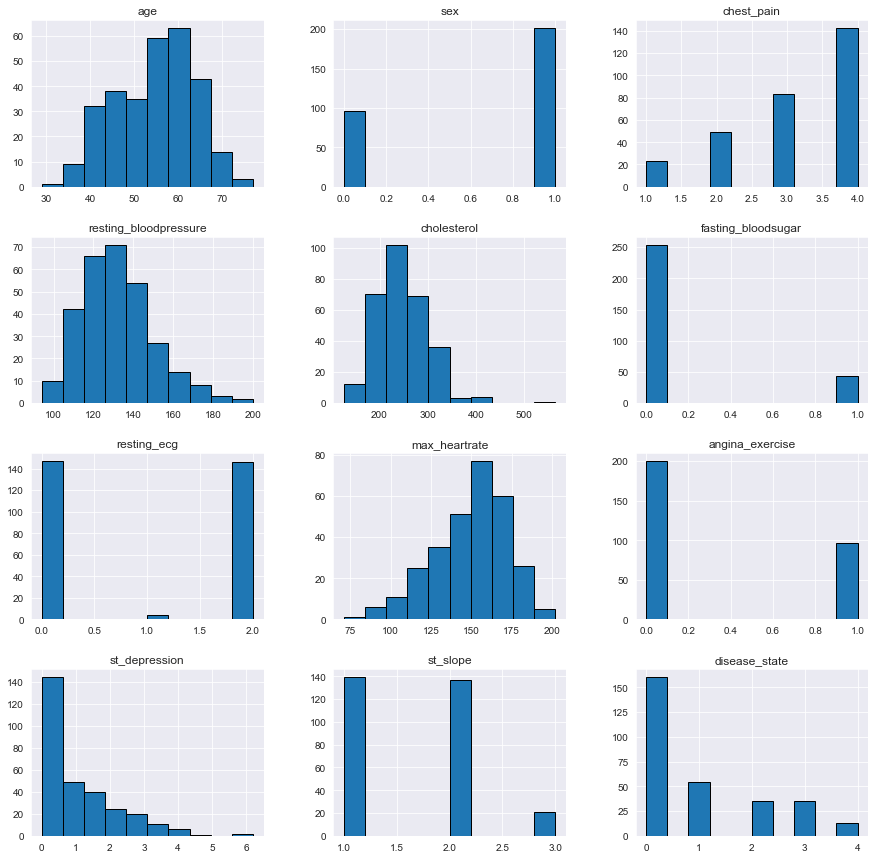

In [25]:
#Exploring the distribution of patients with and without coronoary disease

df.hist(figsize=(15,15),edgecolor='black')
plt.savefig('dist1.png')

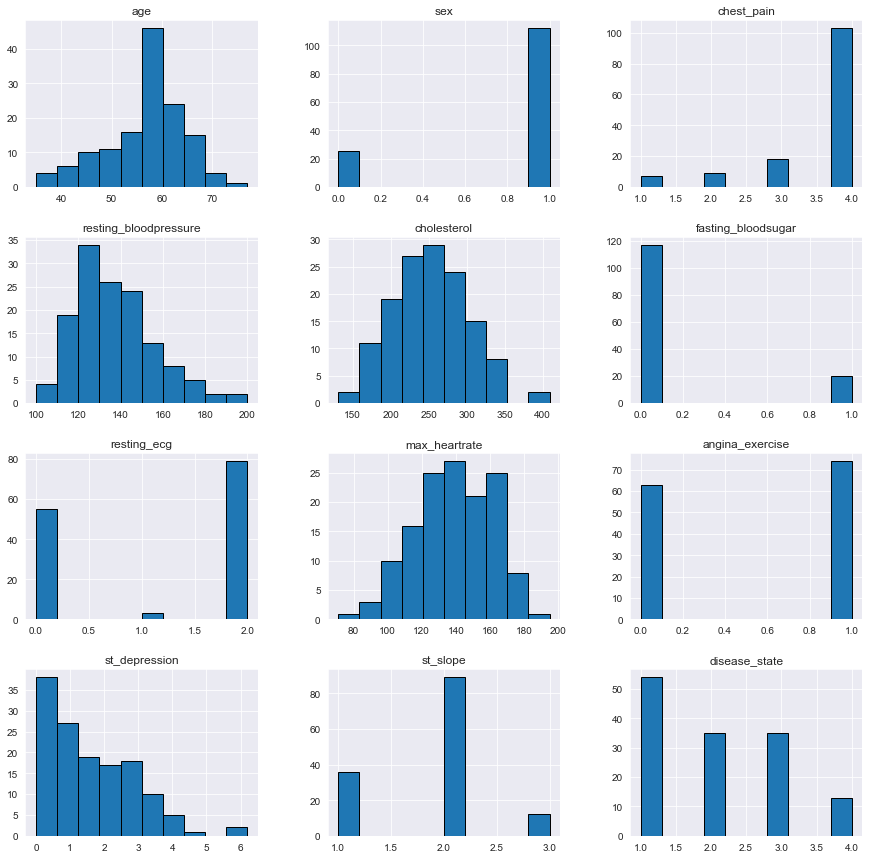

In [26]:
#Exploring distributions in patients with confirmed coronary heart disease

cd = df.loc[df['disease_state'] != 0]
cd.head()
cd.hist(figsize=(15,15),edgecolor='black')
plt.savefig('dist2.png')

Although the distributions remain similar for several attributes, there are clear biases towards certain values/ranges in attributes like age and chest pain.

We can see that most participants with coronary disease have level 1 occlusion, with fairly even spread between levels 2 and 3, and the smalest group at level 4.

I want to compare the disease vs non-diseased group together directly so will create a new dataframe categorising all patients with coronary disease as value 1, and non-diseased remaining at 0.

In [8]:
df['diagnosis'] = np.where(df['disease_state'] > 0, 1, 0)
df1 = df.drop(columns='disease_state')
df1

/var/folders/x3/n28j48sn39s4n3ny7h7j1p4w0000gn/T/ipykernel_58389/3143497974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diagnosis'] = np.where(df['disease_state'] > 0, 1, 0)


,age,sex,chest_pain,resting_bloodpressure,cholesterol,fasting_bloodsugar,resting_ecg,max_heartrate,angina_exercise,st_depression,st_slope,vessel_calcification,stress_test,diagnosis
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


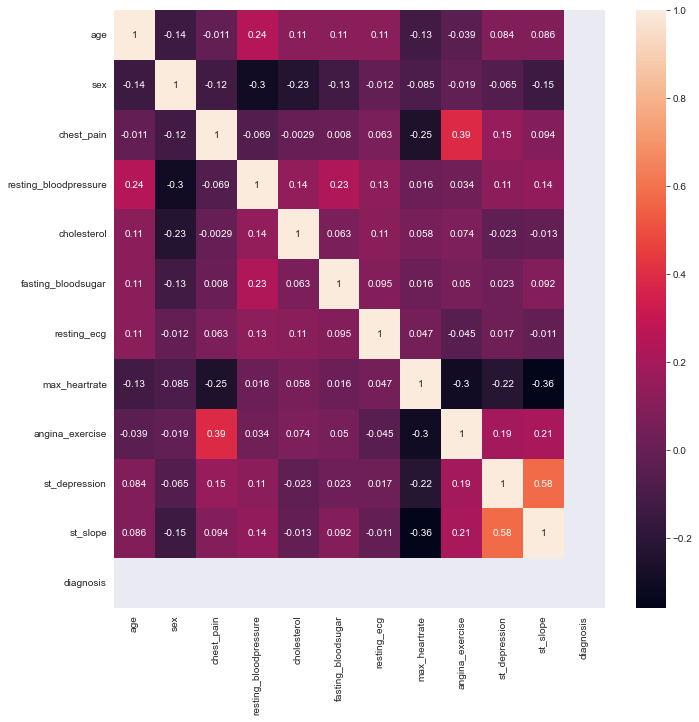

In [27]:
#Exploring correlations between attributes for participants with coronary disease and not.

disease = df1[df1.diagnosis == 1]
no_disease = df1[df1.diagnosis == 0]

plt.figure(figsize=(11,11))
sns.heatmap(disease.corr(), annot=True)
plt.savefig('corr1.png')

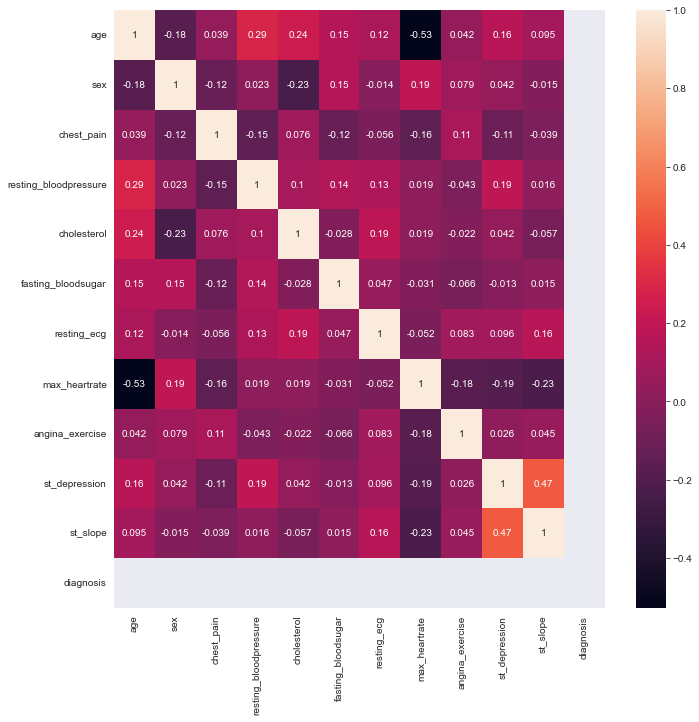

In [28]:
plt.figure(figsize=(11,11))
sns.heatmap(no_disease.corr(), annot=True)
plt.savefig('corr2.png')

Neither matrix show strong correlations in many attributes, but we note differing patterns of correlation in the same attributes.

## Predictive modelling

In this section we aim to develop an accurate predictor of coronary disease from the available data.

[0.0747134  0.04383828 0.10361967 0.06295453 0.06118913 0.0183192
 0.03495556 0.08063894 0.07281886 0.08143214 0.05821487 0.13755166
 0.16975376]


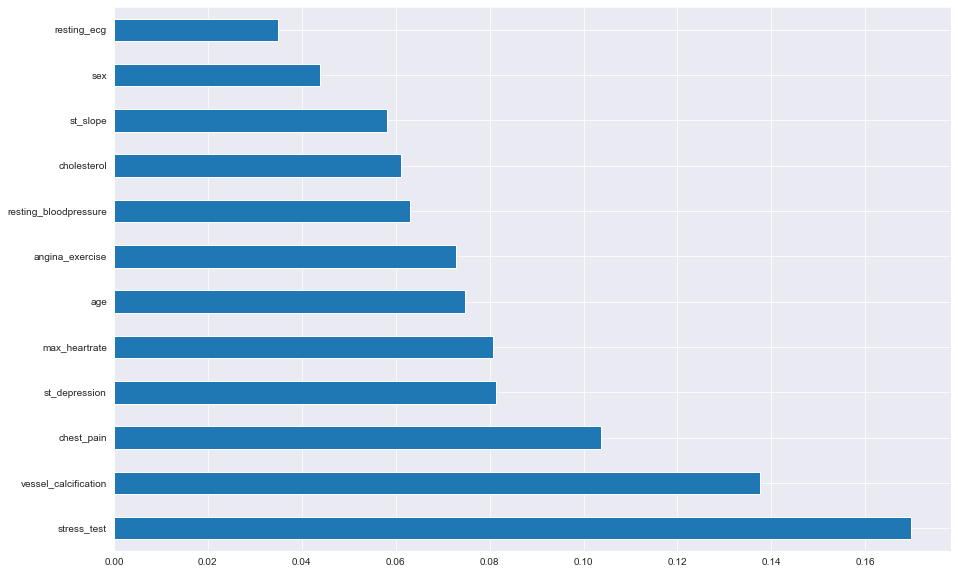

<Figure size 1080x720 with 0 Axes>

In [29]:
# Feature Selection

plt.rcParams['figure.figsize']=15,10 
sns.set_style("darkgrid")

x = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()
plt.savefig('features.png')

Here we see the features with the most importance are:
* stress test performance
* vessel calcification
* chest pain

The least important features will be dropped in the future model.

In [12]:
df2 = df1[['chest_pain', 'vessel_calcification', 'stress_test', 'diagnosis']]
df2

,chest_pain,vessel_calcification,stress_test,diagnosis
0,1,0,6,0
1,4,3,3,1
2,4,2,7,1
3,3,0,3,0
4,2,0,3,0
...,...,...,...,...
297,4,0,7,1
298,1,0,7,1
299,4,2,7,1
300,4,1,7,1


In [13]:
# spliting the data

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

x=df2.drop('diagnosis',axis=1)
y=df2.diagnosis

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [14]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Logistic Regression

In [15]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fitting the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy
acc_lg = accuracy_score(y_test, y_pred)

mylist.append(acc_lg)
print(cm)
print(acc_lg)

[[44  8]
 [ 6 32]]
0.8444444444444444


## Support Vector Machine

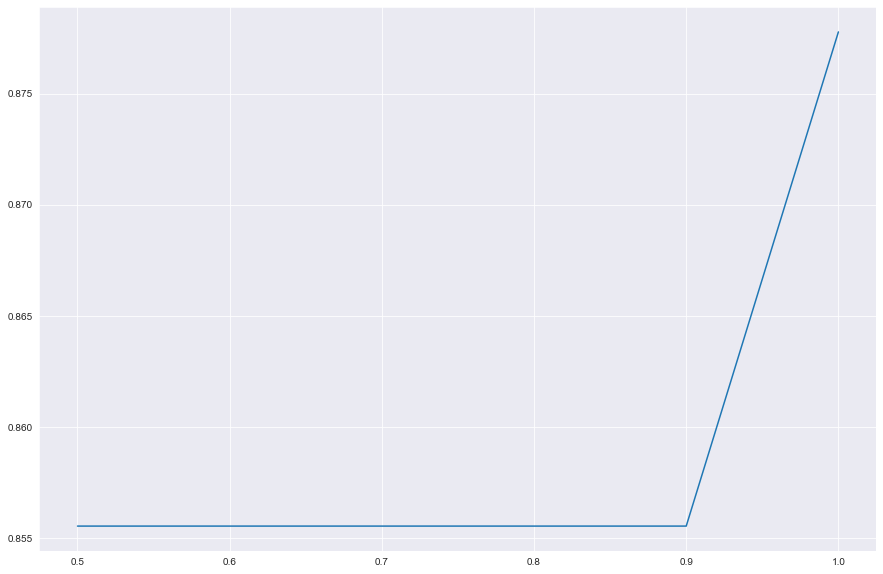

In [16]:
# Support vector machine

from sklearn.svm import SVC
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

In [17]:
# Training the SVC

from sklearn.svm import SVC
classifier = SVC(C = 0.7, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Confusion matrix and accuracy score

cm = confusion_matrix(y_test, y_pred)
acc_svc = accuracy_score(y_test, y_pred)
print(cm)
print(acc_svc)
mylist.append(acc_svc)

[[44  8]
 [ 5 33]]
0.8555555555555555


## Random Forest

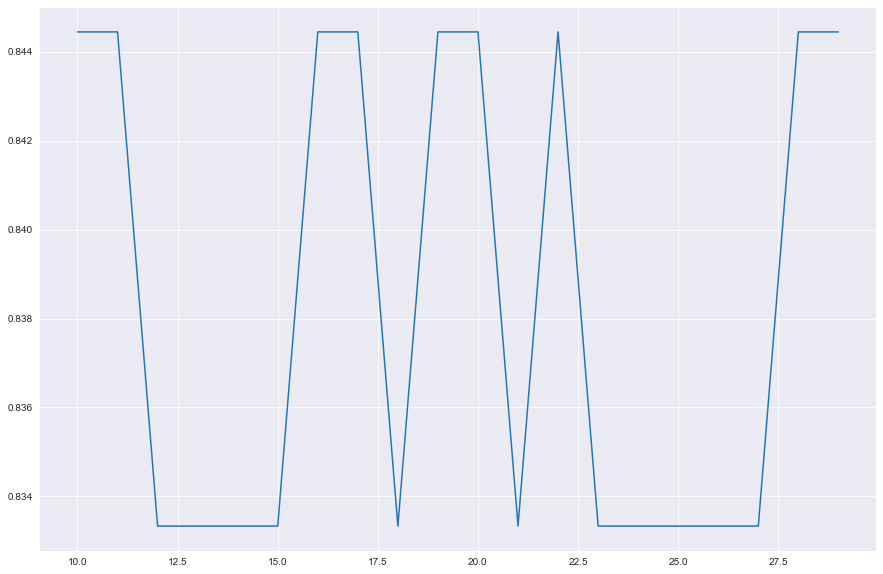

In [18]:
#Finding the optimal number od estimators without training the model multiple times

from sklearn.ensemble import RandomForestClassifier
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))

plt.plot(list(range(10,30)), list1)
plt.show()


In [19]:
# Training the Random Forest Classifier

classifier = RandomForestClassifier(n_estimators = 22, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)


In [20]:
acc_randomforest = accuracy_score(y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest)

[[44  8]
 [ 5 33]]
0.8444444444444444


In [21]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines','Random Forest'],
    'Score': [acc_lg, acc_svc, acc_randomforest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Support Vector Machines,0.855556
0,Logistic Regression,0.844444
2,Random Forest,0.844444


Of the 3 methods tried, we see that logistic regression performs the worst. Although the exact accuracy scores vary slightly with each iteration, this trend generally remains consistent.

## Risk Calculator

In this section, the random forest classifier is used to develop a disease calculator. Pipeline and joblib are used to save the model so it can be called in the calculator without creating a new model each time.

In [22]:
#Creating a new random forest classifier. In order to build a calculator that
# predicts the degree of coronary disease, I reload the dataset and include the disease state column.

df = pd.read_csv("/Users/berylsawyerr/Downloads/processed_cleveland.csv")
df = df.rename(columns={"cp": "chest_pain", "trestbps": "resting_bloodpressure", "chol":"cholesterol", "fbs":"fasting_bloodsugar", "restecg":"resting_ecg", "thalach":"max_heartrate", "exang":"angina_exercise", "oldpeak":"st_depression", "slope":"st_slope", "ca":"vessel_calcification", "thal":"stress_test", "num":"disease_state"})

df = df[ (df['vessel_calcification'] != '?') & (df['stress_test'] != '?')]

df2 = df[['chest_pain', 'vessel_calcification', 'stress_test', 'disease_state']]

x=df2.drop('disease_state',axis=1)
y=df2.disease_state

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# Creating our pipeline that first preprocesses the data, then scales the data, then fits the data to a RandomForsestClassifier

rfc_pipeline = Pipeline(steps = [
    ('sc', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators = 22))
])


rfc_pipeline.fit(x_train, y_train)
joblib.dump(rfc_pipeline, 'rfc_pipeline.joblib')

y_pred = rfc_pipeline.predict(x_test)


In [23]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
app.config.suppress_callback_exceptions = True
server = app.server

style = {'padding': '1.5em'}

app.layout = html.Div([
    dcc.Markdown("""
        ### Predict
        Use the controls below to update your predicted diagnosis of coronary disease, based on chest pain, vessel calcification and stress test performance.
        Scores range from 0-4 and denote the degree of coronary occlusion, with 0 indicating no occlusion and 4 corresponding to the worst.
    """),

    html.Div(id='prediction-content', style={'fontWeight': 'bold'}),


    html.Div([
        dcc.Markdown('###### Chest Pain'),
        dcc.Slider(
            id='chest_pain',
            min=1,
            max=4,
            step=1,
            value=3,
            marks={n: str(n) for n in range(1, 4, 1)}
        ),
    ], style=style),

    html.Div([
        dcc.Markdown('###### Vessel Calcification'),
        dcc.Slider(
            id='vessel_calcification',
            min=0,
            max=3,
            step=1,
            value=2,
            marks={n: str(n) for n in range(0, 3, 1)}
        ),
    ], style=style),

    html.Div([
        dcc.Markdown('###### Stress Test'),
        dcc.Slider(
            id='stress_test',
            min=3,
            max=7,
            step=1,
            value=3,
            marks={n: str(n) for n in range(3, 7, 1)}
        ),
    ], style=style),


])


@app.callback(
    Output('prediction-content', 'children'),
    [Input('chest_pain', 'value'),
     Input('vessel_calcification', 'value'),
     Input('stress_test', 'value')])

def predict(chest_pain, vessel_calcification, stress_test):

 
    df3 = pd.DataFrame(
        columns=['Chest Pain', 'Vessel Calcification', 'Stress Test'],
        data=[[chest_pain, vessel_calcification, stress_test]]
    )

    rfc_pipeline = joblib.load('rfc_pipeline.joblib')
    y_pred_log = rfc_pipeline.predict(df3)
    y_pred = y_pred_log[0]
    results = f'The predicted diagnosis is {y_pred:,.0f}.'

    return results
     
     
app.run_server(mode='external')     

Dash app running on http://127.0.0.1:8050/
